<a href="https://colab.research.google.com/github/FreeMagic200/scRNA_R_pseudotime/blob/main/20250206_cytotrace2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# cytotrace2

```
mamba install -c conda-forge -c bioconda \
    r-base \
    r-biocmanager \
    r-seurat=5 \
    r-presto \
    r-seurat-data \
    r-dplyr \
    r-patchwork \
    r-remotes \
    r-devtools \
    r-irkernel \
    jupyterlab \
    python=3.9 \
    pip \
    zlib \
    liblzma \
    backports.lzma \
    r-r.utils \
    r-qs \
    r-ggplot2 \
    r-ggvenn \
    r-ggalluvial \
    r-pheatmap \
    r-mclustcomp \
    r-fossil \
    r-aricode \
    r-venndiagram \
    r-hiclimr \
    r-tidyverse

install.packages("ggview")  # 安装ggview
remotes::install_github('satijalab/seurat-wrappers')  # 安装seurat-wrappers

# Cytotrace2安装
devtools::install_github("digitalcytometry/cytotrace2", subdir = "cytotrace2_r")

```

In [15]:
library(CytoTRACE2)
library(tidyverse)
library(Seurat)
library(qs)
library(patchwork)

In [4]:
seu_obj <- qread("/mnt/data/projects/sc_25/05_annotation/09_low_quality_filtered.qs")

In [5]:
seu_obj@meta.data$CB <- rownames(seu_obj@meta.data)
sample_CB <- seu_obj@meta.data %>%
  group_by(class_annotation) %>%
  sample_frac(0.3)
seu_obj_sampled <- subset(seu_obj,CB %in% sample_CB$CB)
seu_obj_sampled

An object of class Seurat 
57771 features across 33490 samples within 2 assays 
Active assay: RNA (55771 features, 2500 variable features)
 14 layers present: data, counts, scale.data.1.1.1.1.1.1.1.1.1.1, scale.data.2.1.1.1.1.1.1.1.1.1, scale.data.2.1.1.1.1.1.1.1.1, scale.data.2.1.1.1.1.1.1.1, scale.data.2.1.1.1.1.1.1, scale.data.2.1.1.1.1.1, scale.data.2.1.1.1.1, scale.data.2.1.1.1, scale.data.2.1.1, scale.data.2.1, scale.data.2, scale.data
 1 other assay present: mnn.reconstructed
 11 dimensional reductions calculated: pca, integrated.jointpca, integrated.mnn, integrated.harmony, integrated.cca, integrated.rpca, mnn.umap, jointpca.umap, harmony.umap, rpca.umap, cca.umap

In [6]:
cytotrace2_result_sce <- cytotrace2(seu_obj_sampled,
                                is_seurat = TRUE,
                                slot_type = "counts",
                                seed = 42)

cytotrace2: Started loading data

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 13.9 GiB”
Dataset contains 55771 genes and 33490 cells.

cytotrace2: Running on 4 subsample(s) approximately of length 10000

cytotrace2: Started running on subsample(s). This will take a few minutes.

cytotrace2: Started preprocessing.

14267 input genes mapped to model genes.

cytotrace2: Started prediction.

This section will run using  8 / 16 core(s).

cytotrace2: Started postprocessing.

cytotrace2: Running with fast mode (subsamples are processed in parallel)

This section will run on 9 sub-sample(s) of approximately 930 cells each using 8 / 16 core(s).

Number of cores for KNN: 8

cytotrace2: Started preprocessing.

14267 input genes mapped to model genes.

cytotrace2: Started prediction.

This section will run using  8 / 16 core(s).

cytotrace2: Started postprocessing.

cytotrace2: Running with fast mode (subsamples are processed in parallel)

This section w

In [7]:
cytotrace2_result_sce

An object of class Seurat 
57771 features across 33490 samples within 2 assays 
Active assay: RNA (55771 features, 2500 variable features)
 14 layers present: data, counts, scale.data.1.1.1.1.1.1.1.1.1.1, scale.data.2.1.1.1.1.1.1.1.1.1, scale.data.2.1.1.1.1.1.1.1.1, scale.data.2.1.1.1.1.1.1.1, scale.data.2.1.1.1.1.1.1, scale.data.2.1.1.1.1.1, scale.data.2.1.1.1.1, scale.data.2.1.1.1, scale.data.2.1.1, scale.data.2.1, scale.data.2, scale.data
 1 other assay present: mnn.reconstructed
 11 dimensional reductions calculated: pca, integrated.jointpca, integrated.mnn, integrated.harmony, integrated.cca, integrated.rpca, mnn.umap, jointpca.umap, harmony.umap, rpca.umap, cca.umap

In [8]:
# making an annotation dataframe that matches input requirements for plotData function
annotation <- data.frame(phenotype = seu_obj_sampled@meta.data$class_annotation) %>%
  set_rownames(., colnames(seu_obj_sampled))

In [9]:
# plotting
plots <- plotData(cytotrace2_result = cytotrace2_result_sce,
                  annotation = annotation,
                  is_seurat = TRUE)

Preparing input for visualization.

Creating plots.

Done. You can access any plot directly from the returned list by '$' operator (i.e. plots$CytoTRACE2_Potency_UMAP).



In [37]:
umap_raw <- as.data.frame(seu_obj_sampled@reductions$rpca.umap@cell.embeddings) # 为后面修改坐标有用
head(umap_raw)

,rpcaumap_1,rpcaumap_2
,<dbl>,<dbl>
_E11_1_TCGGATATCCATCCGT-1,6.637496,1.863431
_E11_1_TTAGTCTCACATGAAA-1,7.423210,1.878737
_E11_1_TAACGACGTAGTCACT-1,8.501669,1.292401
_E11_1_CTCCAACCAAGCTGCC-1,7.713653,3.005059
_E11_1_TTTGGTTCACTTCAAG-1,-1.983690,3.425909
_E11_1_TGTGTGATCGCACGAC-1,9.120860,5.918310


In [38]:
# 创建一个包含所有需要更新的 plot 名称的向量
plot_names <- c("CytoTRACE2_UMAP", "CytoTRACE2_Potency_UMAP",
                "CytoTRACE2_Relative_UMAP", "Phenotype_UMAP"
)
# 循环遍历每个plot并更新坐标
for (plot_name in plot_names) {
  if (!is.null(plots[[plot_name]][[1]]$data)) {
    plots[[plot_name]][[1]]$data$umap_1 <- umap_raw$rpcaumap_1
    plots[[plot_name]][[1]]$data$umap_2 <- umap_raw$rpcaumap_2
  }
}

In [39]:
# 绘制CytoTRACE2_Potency的umap图
p1 <- plots$CytoTRACE2_UMAP
# 绘制CytoTRACE2_Potency的umap图
p2 <- plots$CytoTRACE2_Potency_UMAP
# 绘制CytoTRACE2_Relative的umap图 ，v1
p3 <- plots$CytoTRACE2_Relative_UMAP
# 绘制各细胞类型CytoTRACE2_Score的箱线图
p4 <- plots$CytoTRACE2_Boxplot_byPheno

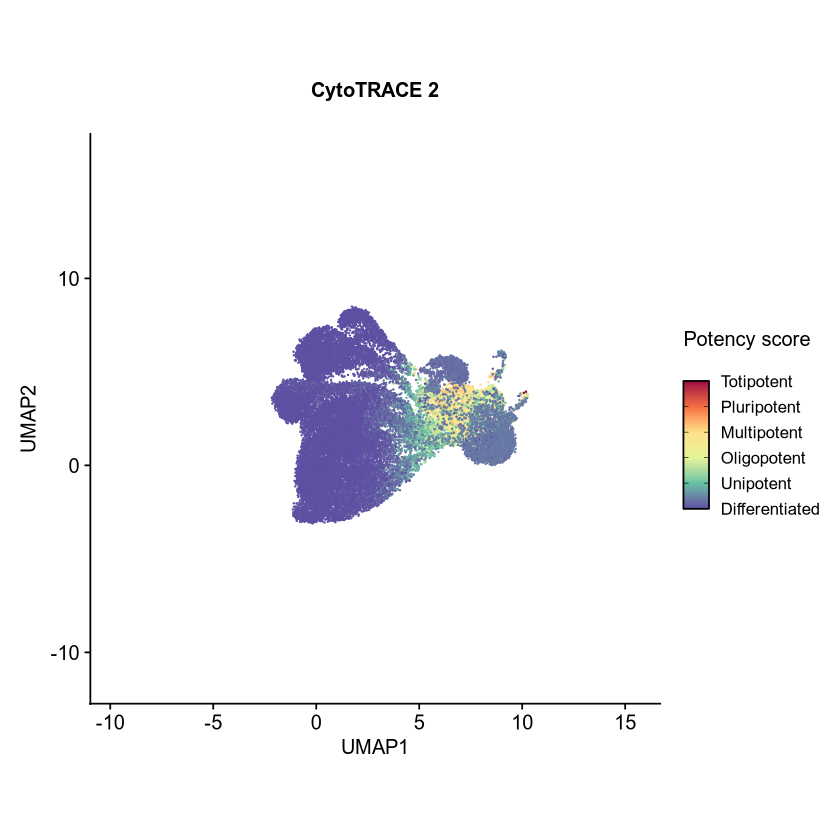

In [40]:
p1

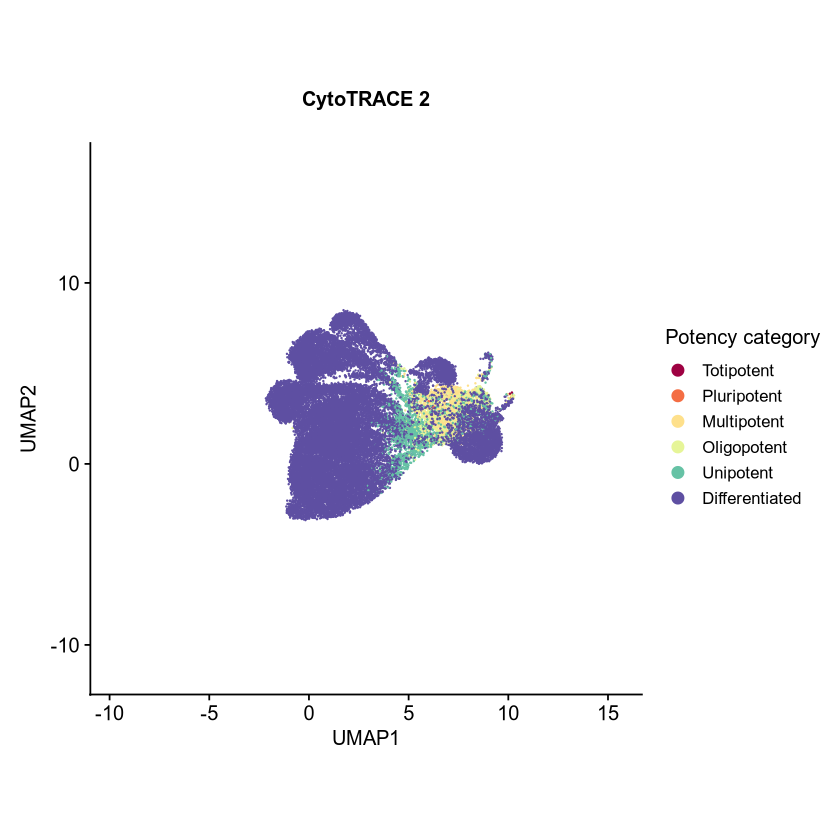

In [41]:
p2

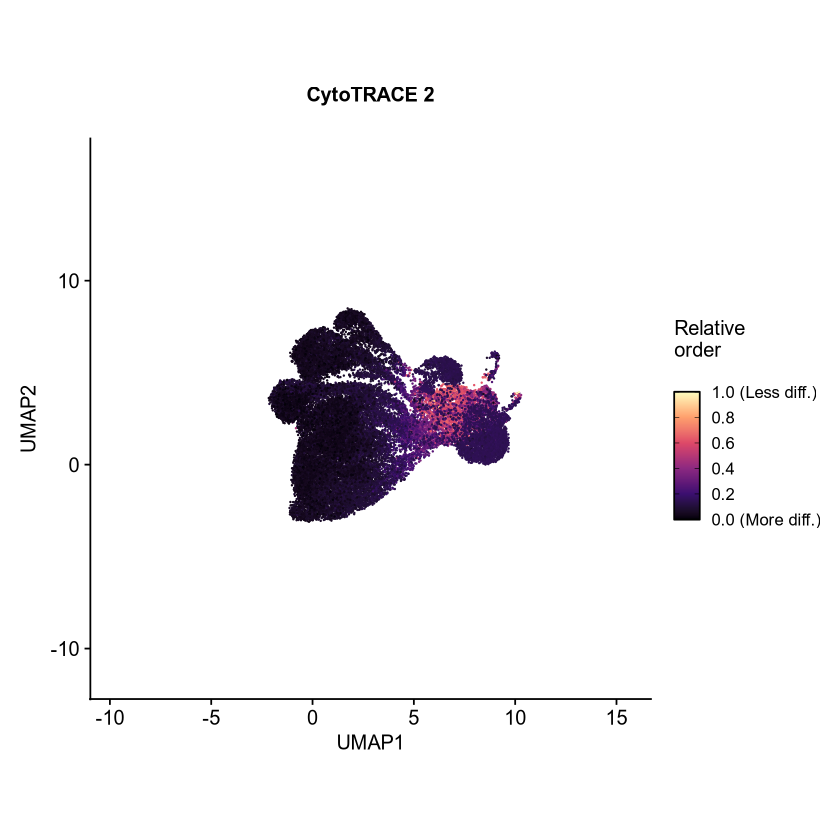

In [42]:
p3

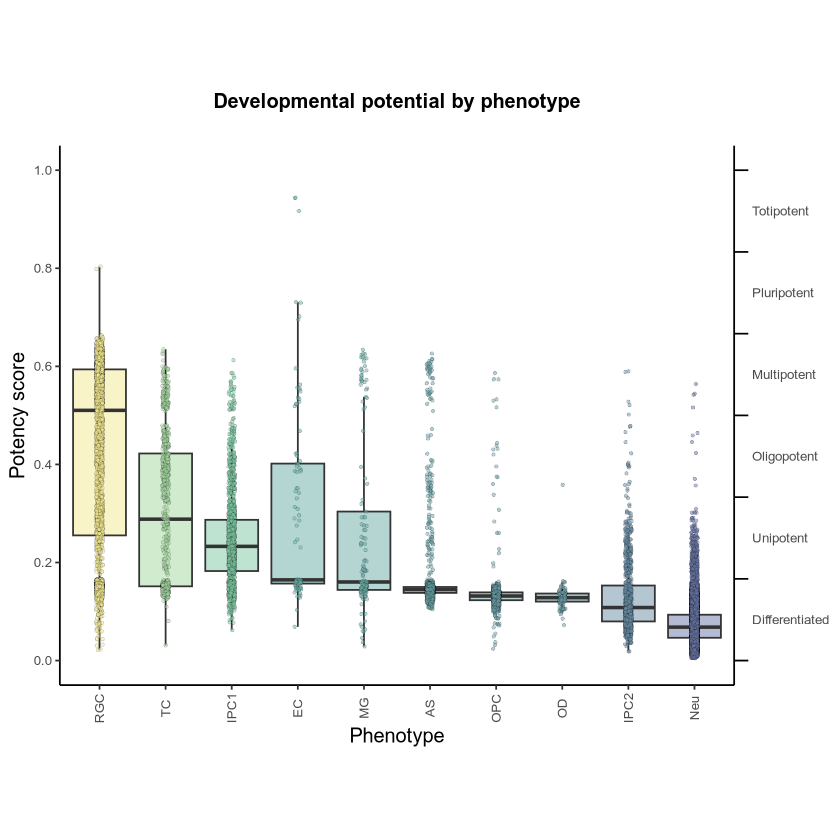

In [21]:
p4

In [30]:
head(cytotrace2_result_sce$CytoTRACE2_Relative)

_E11_1_TCGGATATCCATCCGT-1 _E11_1_TTAGTCTCACATGAAA-1 _E11_1_TAACGACGTAGTCACT-1 
               0.65936173                0.66838815                0.62079098 
_E11_1_CTCCAACCAAGCTGCC-1 _E11_1_TTTGGTTCACTTCAAG-1 _E11_1_TGTGTGATCGCACGAC-1 
               0.64674581                0.05399091                0.56760657

In [28]:
table(cytotrace2_result_sce$CytoTRACE2_Potency)


Differentiated      Unipotent    Oligopotent    Multipotent    Pluripotent 
         28453           2052           1038           1938              6 
    Totipotent 
             3 

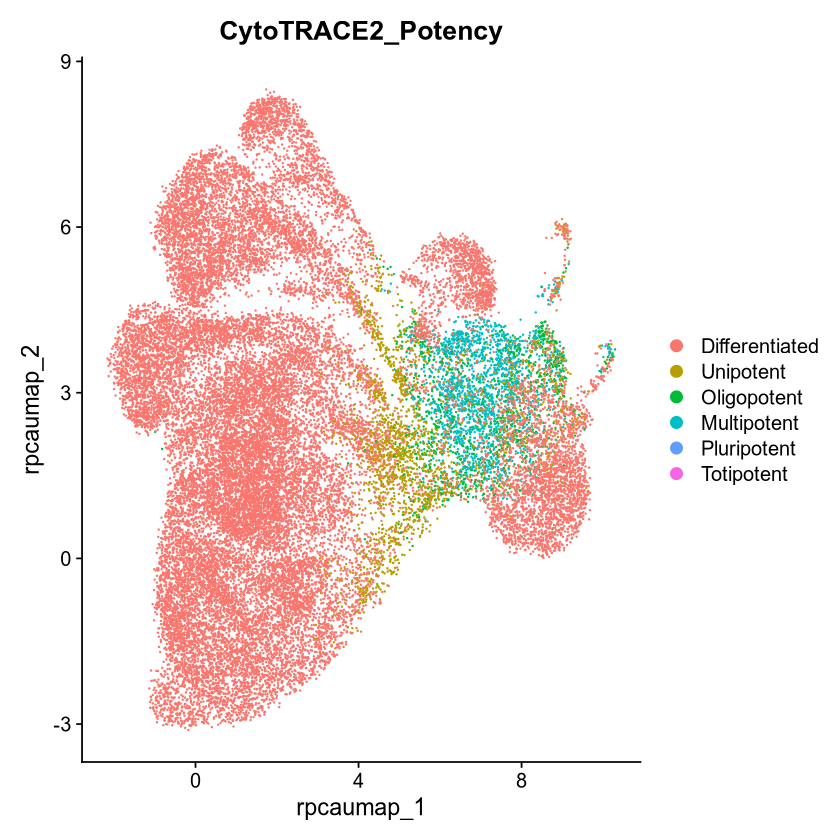

In [29]:
DimPlot(cytotrace2_result_sce,group.by = "CytoTRACE2_Potency", reduction = "rpca.umap")

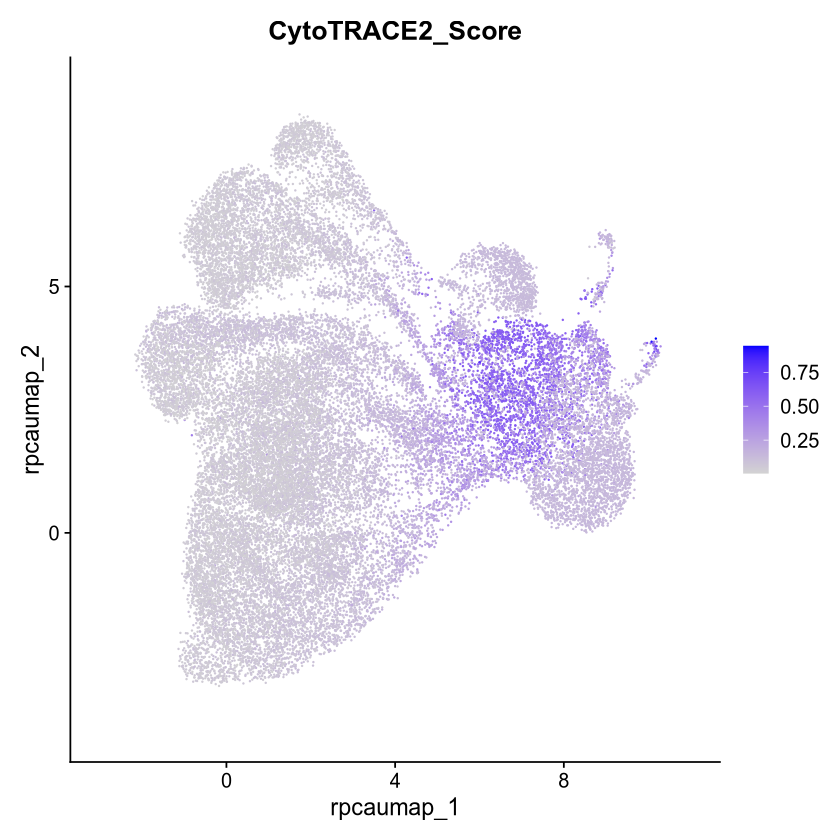

In [26]:
FeaturePlot(cytotrace2_result_sce,"CytoTRACE2_Score", reduction = "rpca.umap")

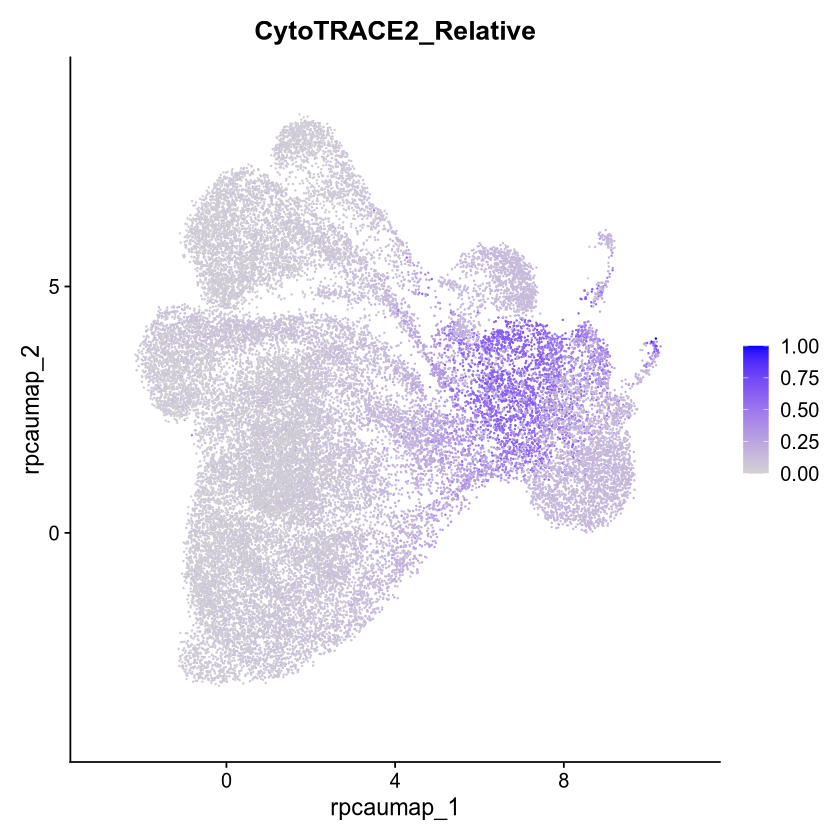

In [31]:
FeaturePlot(cytotrace2_result_sce,"CytoTRACE2_Relative", reduction = "rpca.umap")

In [43]:
qsave(cytotrace2_result_sce,"/mnt/data/projects/sc_25/13_pseudo_time/cytotrace2/20250207-cytotrace2_result_sce.qs")